In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

C:\Users\devan\AppData\Local\Temp\ipykernel_15812\3884926229.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = 'dataset.csv'  
df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

In [4]:
# Analyze the distribution of classes (MI=0, MI=1, MI=2)
class_distribution = df['MI'].value_counts()
print("\nDistribution of classes:")
print(class_distribution)


Distribution of classes:
MI
0    895
2    760
1    494
Name: count, dtype: int64


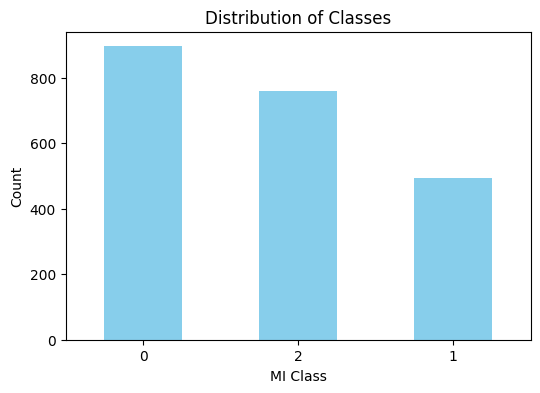

In [6]:
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('MI Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the plot before displaying it
file_path = os.path.join(output_folder, 'Distribution_of_class.png')
plt.savefig(file_path)

# Show the plot after saving it
plt.show()

In [8]:
# Analyze the range and distribution of numerical features
numerical_features = ['Age', 'Gender','ECG', 'CKMB', 'TROP-I', 'LAD', 'LCA', 'RCA', 'Systolic', 'Diastolic', 'Cholesterol','Chest_Pain','Diabetic','PHF /family history']
# Open a file to store summary statistics
with open(os.path.join(output_folder, 'summary_statistics.txt'), 'w') as f:
    for feature in numerical_features:
        # Ensure valid filenames by replacing characters not suitable for filenames
        sanitized_feature = feature.replace('/', '_').replace(' ', '_')
        
        f.write(f"\nSummary statistics for {feature}:\n")
        f.write(str(df[feature].describe()) + '\n')

        # Plot histogram for each numerical feature
        plt.figure(figsize=(6, 4))
        df[feature].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)

        # Save histogram as an image in the output folder
        histogram_file_path = os.path.join(output_folder, f'{sanitized_feature}_histogram.png')
        plt.savefig(histogram_file_path)

        # Close the plot to prevent displaying multiple plots at once
        plt.close()

# Close the file
f.close()

In [9]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [10]:
# Function to add Gaussian noise to numerical features
def add_gaussian_noise(data, std=0.1):
    noise = np.random.normal(scale=std, size=data.shape)
    return data + noise

In [11]:
# Function to apply random shifts and scaling to numerical features
def random_shift_and_scale(data, shift_range=0.1, scale_range=0.1):
    data_array = data.values.reshape(-1, 1)
    shifted_data = data_array + np.random.uniform(low=-shift_range, high=shift_range, size=data_array.shape)
    scaler = MinMaxScaler(feature_range=(1 - scale_range, 1 + scale_range))
    scaled_data = scaler.fit_transform(shifted_data).flatten()
    return scaled_data

In [12]:
# Function to perform data augmentation specific to ECG signals
def augment_ecg_signals(data):
    # Time warping (stretching or compressing the signal)
    warped_data = np.interp(np.linspace(0, 1, len(data)), np.linspace(0, 1, len(data)), data)
    
    # Amplitude scaling
    scaled_data = data * np.random.uniform(0.8, 1.2)
    
    # Adding random noise
    noise = np.random.normal(scale=0.05, size=len(data))
    noisy_data = data + noise
    
    return warped_data, scaled_data, noisy_data

In [13]:
# Function to perform SMOTE for class imbalance
def perform_smote(X, y):
    X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0])
    X_augmented = np.concatenate([X, X_resampled])
    y_augmented = np.concatenate([y, y_resampled])
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented)
    return X_augmented, y_augmented

In [14]:
# 1. Add Gaussian noise to numerical features
numerical_features = ['Age', 'Gender','ECG', 'CKMB', 'TROP-I', 'LAD', 'LCA', 'RCA', 'Systolic', 'Diastolic', 'Cholesterol','Chest_Pain','Diabetic','PHF /family history']
for feature in numerical_features:
    df[feature + '_gaussian_noise'] = add_gaussian_noise(df[feature])

In [15]:
# 2. Apply random shifts and scaling to numerical features
for feature in numerical_features:
    df[feature + '_shift_and_scale'] = random_shift_and_scale(df[feature])

In [16]:
# 3. Perform data augmentation specific to ECG signals
ecg_features = ['ECG']
for feature in ecg_features:
    df[feature + '_warped'], df[feature + '_scaled'], df[feature + '_noisy'] = augment_ecg_signals(df[feature])

In [17]:
# 4. Perform SMOTE for class imbalance
X = df.drop(columns=['MI'])  # Features
y = df['MI']  # Target
X_augmented, y_augmented = perform_smote(X.values, y.values)
df_augmented = pd.DataFrame(data=X_augmented, columns=X.columns)
df_augmented['MI'] = y_augmented

In [ ]:
df_augmented

In [19]:
# Save the augmented dataset to a new CSV file
df_augmented.to_csv('augmented_dataset.csv', index=False)


# Now df_augmented contains the augmented dataset

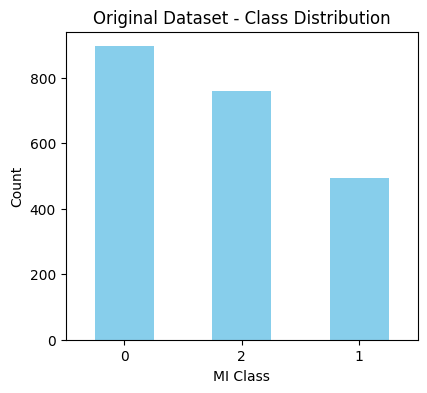

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['MI'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Original Dataset - Class Distribution')
plt.xlabel('MI Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the subplot as an image
subplot_file_path = os.path.join(output_folder, 'class_distribution_subplot.png')
plt.savefig(subplot_file_path)

# Show the plot
plt.show()

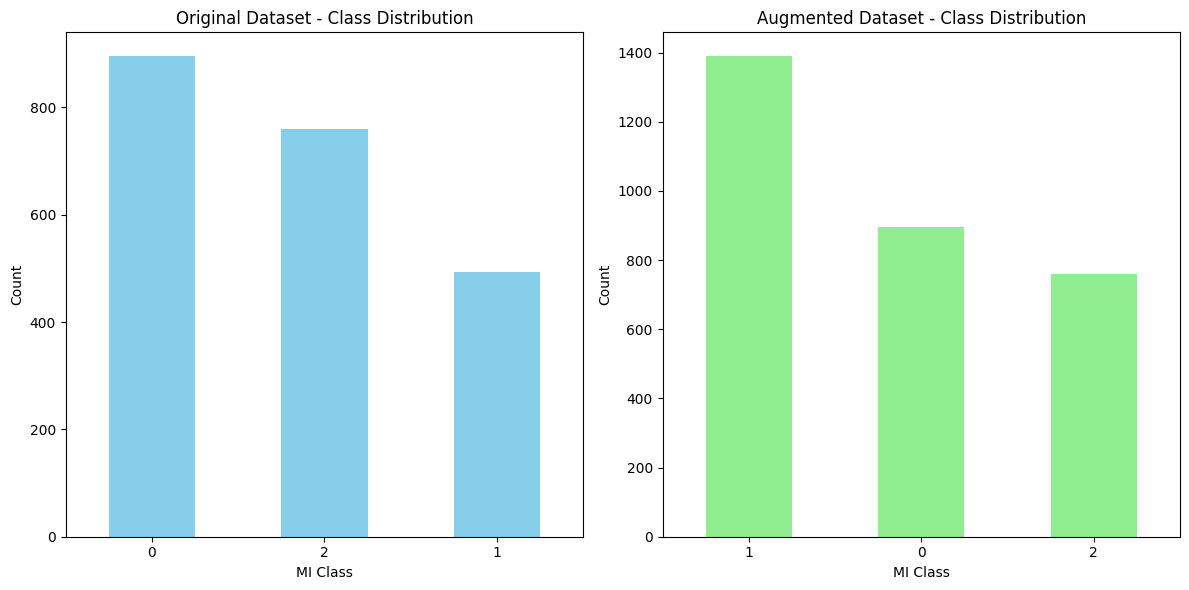

In [21]:
plt.figure(figsize=(12, 6))

# Original Dataset - Class Distribution
plt.subplot(1, 2, 1)
df['MI'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Original Dataset - Class Distribution')
plt.xlabel('MI Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Augmented Dataset - Class Distribution
plt.subplot(1, 2, 2)
df_augmented['MI'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Augmented Dataset - Class Distribution')
plt.xlabel('MI Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as an image
figure_file_path = os.path.join(output_folder, 'class_distribution_subplots.png')
plt.savefig(figure_file_path)

# Show the plot
plt.show()

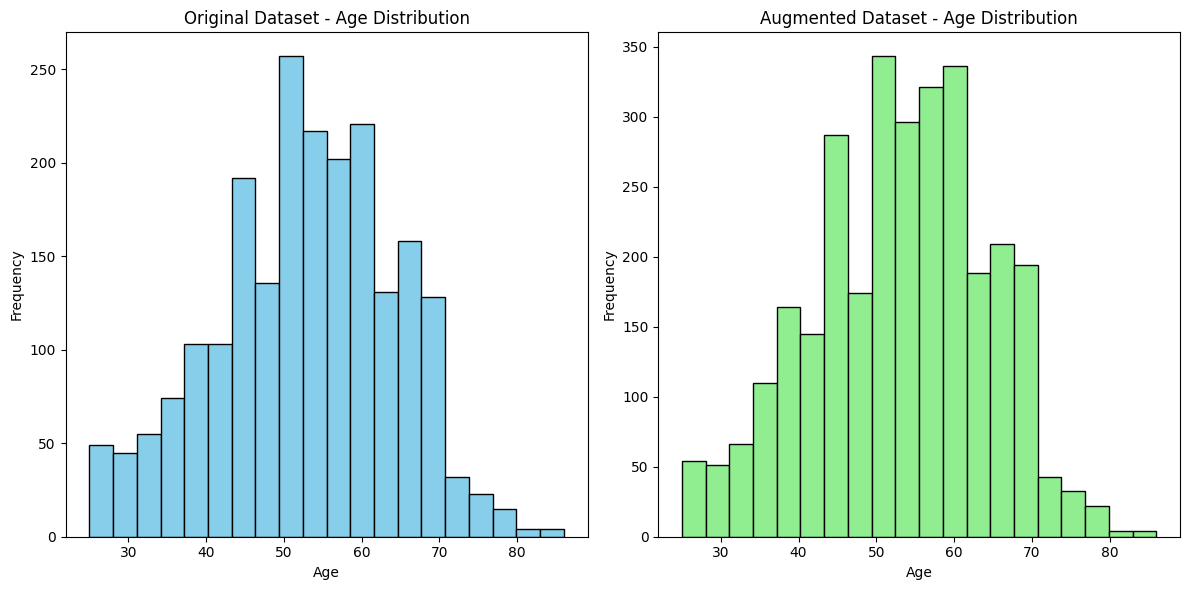

In [22]:
# Plot both distributions
plt.figure(figsize=(12, 6))

# Original Dataset - Age Distribution
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Dataset - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# After Augmentation - Age Distribution
plt.subplot(1, 2, 2)
plt.hist(df_augmented['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Augmented Dataset - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as an image
figure_file_path = os.path.join(output_folder, 'age_distribution_subplots.png')
plt.savefig(figure_file_path)

# Show the plot
plt.show()